In [6]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Linear models for regression

  ### Linear regression (Least-Squares)

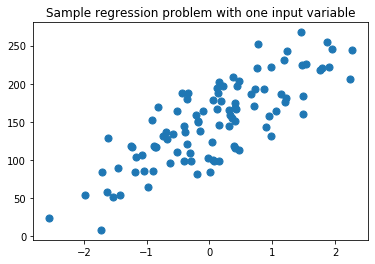

In [2]:
## Synthetic dataset for simple regression

plt.figure()
plt.title('Sample regression problem with one input variable')
X_r, y_r = make_regression(n_samples=100, n_features=1, n_informative=1, bias = 150.0,noise = 30, random_state=0)
plt.scatter(X_r, y_r, marker= 'o', s=50)
plt.show()

## https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


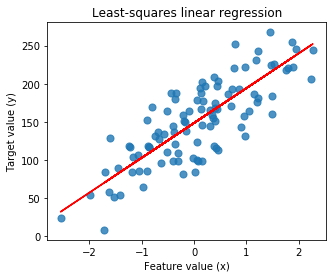

In [4]:
plt.figure(figsize=(5,4))
plt.scatter(X_r, y_r, marker= 'o', s=50, alpha=0.8)
plt.plot(X_r, linreg.coef_ * X_r + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Ridge regression

In [7]:
# Communities and Crime dataset

crime_dataset= pd.read_csv('C:/Users/MAURICIO/Desktop/CommViolPredUnnormalizedData.csv')

(X_crime, y_crime) = crime_dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

### Feauture Normalization

In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

#### Ridge regression as function of alpha

In [ ]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'.format(this_alpha, num_coeff_bigger, r2_train, r2_test))

## Lasso Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))

print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))
        
        
## https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a

### Polynomial regression

In [ ]:
poly = PolynomialFeatures(degree=2)
X_f_poly = poly.fit_transform(X_f)

X_train, X_test, y_train, y_test = train_test_split(X_f_poly, y_f, random_state = 0)
                                                   
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'.format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'.format(linreg.score(X_test, y_test)))